# COURSE: A deep understanding of deep learning
## SECTION: Overfitting, cross-validation, regularization
### LECTURE: Cross-validation on regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [16]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Create the data and the model

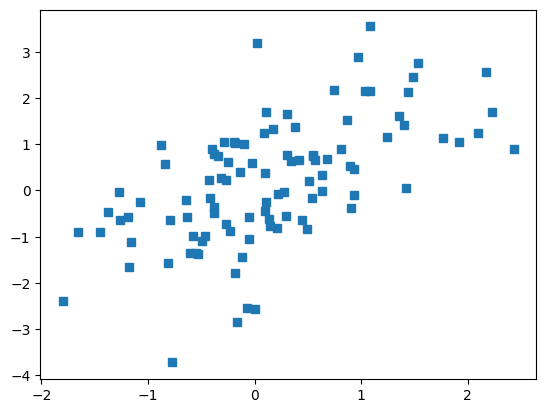

In [19]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [3]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

In [4]:
# model meta-parameters

learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

# Select data for training

In [13]:
# select training data (note the hard-coded N!)
number_of_train_data = int(0.8*N)
trainidx  = np.random.choice(range(N),number_of_train_data,replace=False) # random indices
trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
trainBool[trainidx] = True # set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([800, 1])
torch.Size([200, 1])


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8)

train_data = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
test_data = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))

train_loader = DataLoader(train_data, batch_size=25)
train_loader_complete = DataLoader(train_data, batch_size = train_data.tensors[0].shape[0])
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [21]:
print('TRAINING DATA')
for batch,label in train_loader: # iterable
  print(batch,label)
  print(' ')

TRAINING DATA
tensor([[-0.3110],
        [ 0.2110],
        [ 1.4886],
        [ 0.4173],
        [ 0.5722],
        [-0.5537],
        [ 0.1123],
        [-0.2705],
        [ 2.0932],
        [-0.1812],
        [ 0.0042],
        [-1.1550],
        [ 0.1494],
        [ 0.0878],
        [ 0.0965],
        [-0.1871],
        [-1.7993],
        [-0.1142],
        [ 2.2282],
        [ 1.0399],
        [ 0.4949],
        [-0.5306],
        [-0.0282],
        [ 1.0856],
        [-0.4245]]) tensor([[ 0.2675],
        [-0.8116],
        [ 2.4506],
        [ 0.6607],
        [ 0.6643],
        [-1.3480],
        [-0.2450],
        [-0.7337],
        [ 1.2371],
        [ 1.0241],
        [-2.5682],
        [-1.1062],
        [-0.7784],
        [ 1.2426],
        [-0.4482],
        [-1.7892],
        [-2.4013],
        [-1.4444],
        [ 1.6961],
        [ 2.1463],
        [-0.8286],
        [-1.3669],
        [ 0.6049],
        [ 2.1531],
        [ 0.2259]])
 
tensor([[-0.0991],
        [-0.1

# Train the model

In [23]:
numepochs = 500
for epochi in range(numepochs):

  for x, y in train_loader:
    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [27]:
# report the losses
x, y = next(iter(test_loader))
# compute losses of the TEST set
predYtest = ANNreg(x)
testloss = (predYtest-y).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 0.39
Final TEST loss: 1.47


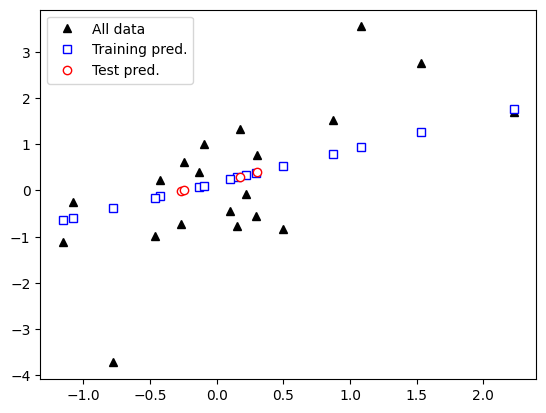

In [31]:
### plot the data
x_tr, y_tr = next(iter(train_loader_complete))
# predictions for final training run
#predYtrain = ANNreg().detach().numpy()
predYtrain = ANNreg(x_tr)

x_te, y_te = next(iter(test_loader))
predYtest = ANNreg(x_te)
# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x_tr, predYtrain.detach(),
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x_te,predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
#
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
#
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?
#